# Informe Operativo de seguridad Balnearia
El objetivo de este informe es analizar y presentar los datos recopilados por el equipo "Náutica Este" durante el operativo de seguridad balnearia temporada 2023-2024, con el fin de proporcionar información para la planificación estratégica de futuras temporadas. Se pretende identificar patrones, tendencias y áreas de mejora, así como optimizar los recursos y protocolos de seguridad.

## Sector: Nautica Este
### Equipo de Trabajo
* Briones Franco
* Salas Daniel
* Pablo Kogan
* Sanchez Micaela (eventual)
* Villavicencio Nicolas (eventual)

### Operación
* Casilla: Balneario Albino Cotro
* Guarda de embarcaciones: Prefectura (isla 132)
* QAP al servicio de Balnearios:
  *  Falher
  *  Albino Cotro
  *  Paseo Limay
* Patrullajes en río Limay:
  * 7.2km Laguna de los Cisnes - Peninsula Hiroki
  * Base durante la jornada:
    * en frente a curva calle Tronador - costa sur
    * en frente de isla 132 (sector playita) - costa sur
* Embarcaciones
  * Semirrigido ODB3: 
  * Moto de Agua Ruso: Yamaha 

### Fuente Información
* Registro del equipo Nautica Este
* Temperatura histórica (https://www.meteored.com.ar/tiempo-en_Neuquen-America+Sur-Argentina-Neuquen--sactual-16888.html)


In [202]:
'''
<style type="text/css">
  .jp-InputPrompt,.jp-OutputPrompt,.jp-OutputArea-prompt,.jp-CodeMirrorEditor {
    display: none;
}
</style>
'''
import pandas as pd
df = pd.read_csv("librodeaguas.csv")
#df.dtypes


In [203]:
#selección
#df[['prevenciones','rescates']]

In [204]:
#df.iloc[0:6]

In [205]:
#df[df['embarcacion']=='ODB3']

### Mapa de lugares y zonas de mayor cantidad de prevenciones
(map.html|map.html)

In [206]:
from ipyleaflet import Map, Marker, basemaps, Popup, AwesomeIcon, Heatmap
from ipywidgets import HTML
def addlabel(marker,name='life-ring',color='red'):
    icon_color='dark'+color
    #print(icon_color+"*")
    icon1 = AwesomeIcon(
        name=name,
        marker_color=color,
        #icon_color=icon_color,
        spin=False)
    message1 = HTML()
    message1.value = marker.name

#message1.placeholder = "PlaceholderSome HTML"
#message1.description = "DescriptionSome HTML"

    popup = Popup(
        location=marker.location,
        child=message1
    )

    marker.popup=popup
    marker.icon=icon1




lugares=pd.read_csv('lugares.csv')

lugaresagregados=[]
def on_location_changed(event):
    # Do some computation given the new marker location, accessible from `event['new']`
    lugaresagregados.append(marker.location)
    pass


center = (-38.9774, -68.0453)

m = Map(center=center, zoom=13)
m=Map(
    #basemap=basemaps.OpenStreetMap.HOT,
    #basemap=basemaps.OpenTopoMap,
    #basemap=basemaps.Gaode.Satellite,
    basemap=basemaps.Esri.WorldImagery,
    center=center,
    zoom=14
)
locations=[]
for i in df.values:
    locations.append([i[-2],i[-1],i[-5]])

heatmap = Heatmap(
    locations=locations,
    radius=30
)
m.add(heatmap)

# Agregar Puestos
for i in lugares.values:
    marker = Marker( draggable=False)
    marker.location = (i[1],i[2])
    marker.name=i[3]
    addlabel(marker,i[4],i[5])
    m.add(marker)
marker = Marker( draggable=True)
marker.location = center
marker.observe(on_location_changed, 'location')
m.add(marker)

#display(m)
m.save('map.html')

# Now that the marker is on the Map, you can drag it with your mouse,
# it will automatically update the `marker.location` attribute in Python

# You can also update the marker location from Python, that will update the
# marker location on the Map:




In [207]:
#df_lugares=pd.DataFrame(lugaresagregados)
#df_lugares.to_csv('lugaresagregados.csv')

In [208]:
df_temp = pd.read_csv("Temperatura.csv")
df_temp['fecha']=pd.to_datetime(df_temp["fecha"], format='%d-%m-%Y')

#df_temp


In [209]:
def transform(fila):
    return fila['prevenciones']+fila['asistencias']+fila['rescates']

def transform_dia(fila):
    return fila['fechaok'].weekday()

def transform_dia_nombre(fila):
    dias=['0Lunes','1Martes','2Miercoles','3Jueves','4Viernes','5Sabado','6Domingo']
    return dias[fila['dia']]
        
#df['totalAsistencias']=df.apply(transform, axis=1)

df['fechaok']=pd.to_datetime(df["fecha"], format='%d-%m-%Y')

df['dia']=df.apply(transform_dia, axis=1)
df['dia_nombre']=df.apply(transform_dia_nombre, axis=1)
#def transform_nro_semana(fila):
#    return int(fila.index()/7)

#df['semanaNumero']=df.apply(transform_nro_semana, axis=1)

   ### Totales Temporada

In [210]:
totales=df.agg({
    'horas':sum,
    'litrosNafta':sum,
    'km':sum,
    'prevenciones':sum,
    'asistencias':sum,
    'rescates':sum,
    'fecha':'count'
})
totales['velocidad Media km/h']=round(totales['km']/totales['horas'],2)
totales['consumo Medio l/km']=round(totales['litrosNafta']/totales['km'],2)
totales['consumo Medio l/h']=round(totales['litrosNafta']/totales['horas'],2)
totales['prevenciones Media prevenciones/hora']=round(totales['prevenciones']/totales['horas'],2)
totales

horas                                    107.00
litrosNafta                              587.50
km                                      1540.00
prevenciones                             644.00
asistencias                               36.00
rescates                                  14.00
fecha                                     56.00
velocidad Media km/h                      14.39
consumo Medio l/km                         0.38
consumo Medio l/h                          5.49
prevenciones Media prevenciones/hora       6.02
dtype: float64

In [211]:
agrupado_responsable=df.groupby('responsable').agg({
    'horas':sum,
    'litrosNafta':sum,
    'km':sum,
    'prevenciones':sum,
    'asistencias':sum,
    'rescates':sum
})
agrupado_embarcacion=df.groupby('embarcacion').agg({
    'horas':sum,
    'litrosNafta':sum,
    'km':sum,
    'prevenciones':sum,
    'asistencias':sum,
    'rescates':sum
})
agrupado_embarcacion['velocidad Media km/h']=round(agrupado_embarcacion['km']/agrupado_embarcacion['horas'],2)
agrupado_embarcacion['consumo Medio l/km']=round(agrupado_embarcacion['litrosNafta']/agrupado_embarcacion['km'],2)
agrupado_embarcacion['consumo Medio l/h']=round(agrupado_embarcacion['litrosNafta']/agrupado_embarcacion['horas'],2)
agrupado_embarcacion['prevenciones Media prevenciones/hora']=round(agrupado_embarcacion['prevenciones']/agrupado_embarcacion['horas'],2)

agrupado_dia=df.groupby('dia_nombre').agg({
    'horas':sum,
    'litrosNafta':sum,
    'km':sum,
    'prevenciones':sum,
    'asistencias':sum,
    'rescates':sum
})


  ### Total de km recorridos por embarcación y responsable

In [212]:
agrupado_embarcacion


,horas,litrosNafta,km,prevenciones,asistencias,rescates,velocidad Media km/h,consumo Medio l/km,consumo Medio l/h,prevenciones Media prevenciones/hora
embarcacion,,,,,,,,,,
MRuso,17.0,157.5,280,121,5,3,16.47,0.56,9.26,7.12
ODB3,90.0,430.0,1260,523,31,11,14.00,0.34,4.78,5.81


In [213]:
agrupado_responsable

,horas,litrosNafta,km,prevenciones,asistencias,rescates
responsable,,,,,,
Briones,32.4,201.0,476,198,3,5
Guardia,0.0,0.0,0,0,0,0
Kogan,32.2,149.5,448,190,9,5
Salas,36.4,209.0,532,224,24,3
Sanchez,4.0,20.0,56,17,0,0
Villavicencio,2.0,8.0,28,15,0,1


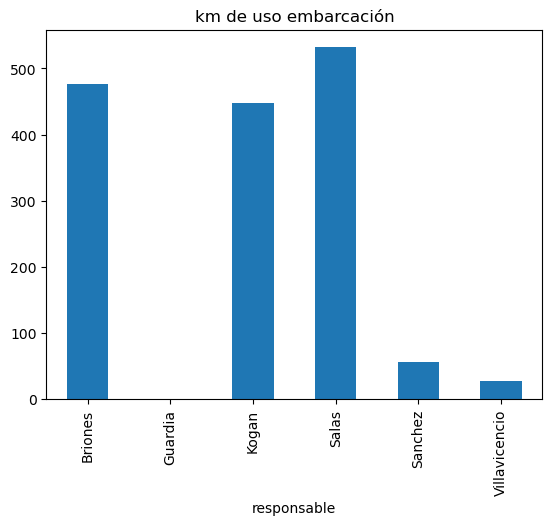

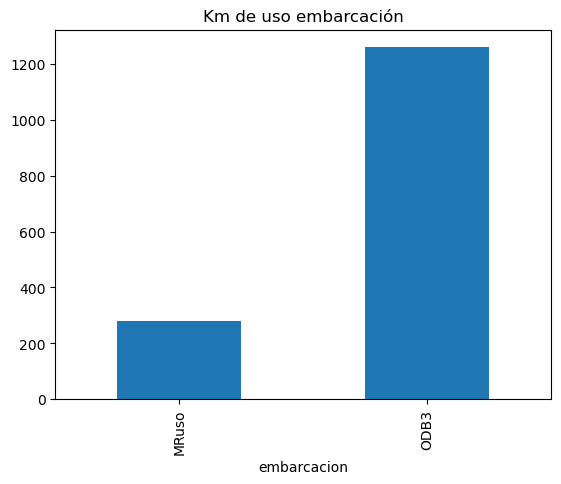

In [214]:
import matplotlib.pyplot as plt
agrupado_responsable['km'].plot(kind='bar',title='km de uso embarcación')
plt.show()
agrupado_embarcacion['km'].plot(kind='bar',title='Km de uso embarcación')

plt.show()

  ### Total de horas por embarcación y responsable

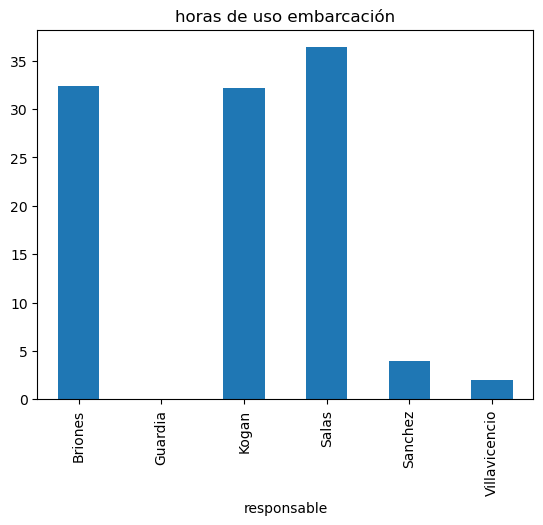

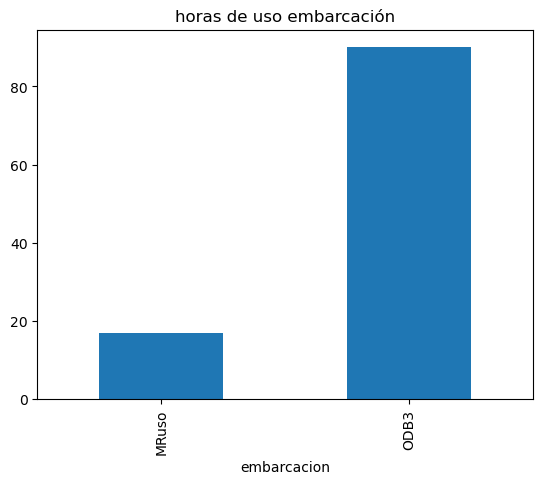

In [215]:
import matplotlib.pyplot as plt
agrupado_responsable['horas'].plot(kind='bar',title='horas de uso embarcación')
plt.show()
agrupado_embarcacion['horas'].plot(kind='bar',title='horas de uso embarcación')

plt.show()

### Prevenciones y Temperatura Media por día Temporada

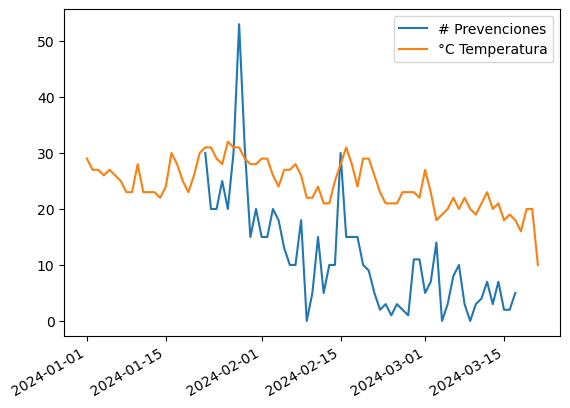

In [216]:
#df.plot(kind='line',x='fechaok',y='prevenciones',title='Prevenciones')
#df_temp.plot(kind='line',x='fecha',y='t.mean',title='Prevenciones')
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(df['fechaok'],df['prevenciones'],label='# Prevenciones')
ax.plot(df_temp['fecha'],df_temp['t.mean'],label='°C Temperatura')
#ax.xaxis.set_minor_locator(mdates.MonthLocator() )

#fig, axs = plt.subplots(3, 1, figsize=(6.4, 7), layout='constrained')
# common to all three:
fig.autofmt_xdate()

plt.legend()
plt.show()

### Prevenciones, asistencias y rescates por día de la semana

In [217]:
agrupado_dia

,horas,litrosNafta,km,prevenciones,asistencias,rescates
dia_nombre,,,,,,
0Lunes,16.0,58.5,224,95,2,4
1Martes,17.3,100.5,224,75,6,2
2Miercoles,15.1,90.5,224,87,6,2
3Jueves,15.5,102.0,224,118,5,3
4Viernes,13.2,70.0,196,63,2,1
5Sabado,15.0,83.0,224,80,13,0
6Domingo,14.9,83.0,224,126,2,2


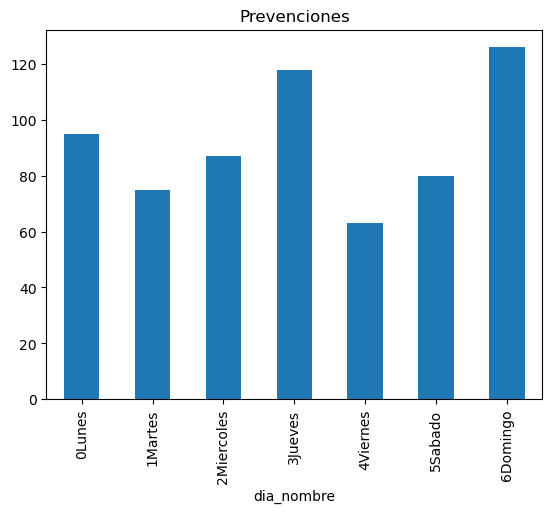

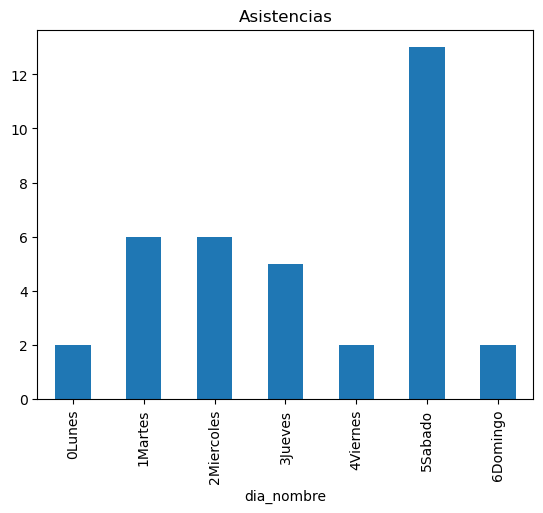

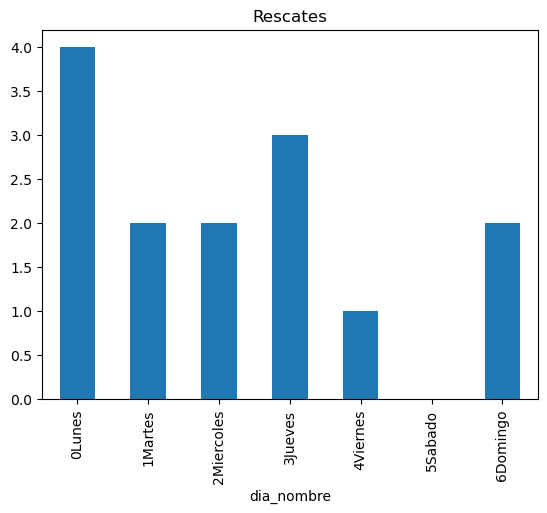

In [218]:
agrupado_dia['prevenciones'].plot(kind='bar',title='Prevenciones')
plt.show()
agrupado_dia['asistencias'].plot(kind='bar',title='Asistencias')
plt.show()
agrupado_dia['rescates'].plot(kind='bar',title='Rescates')
plt.show()
